In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
species = pd.read_csv('species_info.csv', delimiter = ',')
observations = pd.read_csv('observations.csv', delimiter = ',')

In [3]:
print(species.head(), '\n\n')
print(species.dtypes, '\n\n')
print('species dataframe length:', len(species))
print('unique conservations status: ', len(species.conservation_status.unique()))
print('number of NaN conservation status: ', len(species) - len(species[
                                                  (species.conservation_status == 'Species of Concern')
                                                | (species.conservation_status == 'Endangered')
                                                | (species.conservation_status ==  'Threatened')
                                                | (species.conservation_status ==  'In Recovery')
                                                                       ]))
print('unique categories: ', len(species.category.unique()))
print('unique scientific names: ', len(species.scientific_name.unique()))
print('unique common names: ', len(species.common_names.unique()), '\n\n')

print(observations.head(), '\n\n')
print(observations.dtypes, '\n\n')
print('observations datframe length: ', len(observations))
print('unique park names: ', observations.park_name.unique())
print('unique scientific names: ', len(observations.scientific_name.unique()))

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN   


category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object 


species dataframe length: 5824
unique conservations status:  5
number of NaN conservation status:  5633
unique categories:  7
unique scient

In [4]:
print('ORIGINAL SPECIES.head():', '\n')
print(species.head(), '\n\n')

#dropping duplicates but keeping those that have different conservation_status (give 2 scientific_name samples
#with 2 differnt conservations_status entries):
species_no_duplicates = species.drop_duplicates(subset = ['scientific_name', 'conservation_status'])

#fillna:
print('FILL NaN:', '\n')
species_no_duplicates_fillna = species_no_duplicates.fillna('No Intervention', inplace = False)
print(species_no_duplicates_fillna.head(), '\n\n')

#dropping NaN:
species_no_duplicates_dropna = species_no_duplicates.dropna().reset_index()

#grouping by:
print('GROUP BY CATEGORY:', '\n')
groupby_species_1 = species_no_duplicates_dropna.groupby(['category']).scientific_name.count().reset_index()
print(groupby_species_1.head(20), '\n\n')

print('GROUP BY CATEGORY + STATUS:', '\n')
groupby_species_2 = species_no_duplicates.groupby(['category',
                                                   'conservation_status']).scientific_name.count().reset_index()
print(groupby_species_2.head(20), '\n\n')

print('PIVOTED:', '\n')
groupby_species_2_pivoted = groupby_species_2.pivot(index = 'category', columns = 'conservation_status',
                                                    values = 'scientific_name').reset_index()

groupby_species_2_pivoted.columns = ['category', 'Endangered', 'In Recovery',
                                     'Species of Concern', 'Threatened']
print(groupby_species_2_pivoted.head(20), '\n\n')

print('PIVOTED + REORDERED:', '\n')
groupby_species_2_pivoted_reordered = pd.DataFrame([groupby_species_2_pivoted.iloc[4],
                                                    groupby_species_2_pivoted.iloc[5],
                                                    groupby_species_2_pivoted.iloc[0],
                                                    groupby_species_2_pivoted.iloc[2],
                                                    groupby_species_2_pivoted.iloc[3],
                                                    groupby_species_2_pivoted.iloc[6],
                                                    groupby_species_2_pivoted.iloc[1]],
                                                   columns = ['category', 'Endangered', 'In Recovery',
                                                             'Species of Concern', 'Threatened'])
print(groupby_species_2_pivoted_reordered, '\n\n')

print('GROUP BY STATUS:', '\n')
groupby_species_3 = species_no_duplicates.groupby(['conservation_status']).scientific_name.count().reset_index()
print(groupby_species_3, '\n\n')

print('REORDERED:', '\n')
groupby_species_3_reordered = pd.DataFrame([groupby_species_3.iloc[1],
                                            groupby_species_3.iloc[2],
                                            groupby_species_3.iloc[3],
                                            groupby_species_3.iloc[0]],
                                           columns = ['conservation_status', 'scientific_name'])
print(groupby_species_3_reordered)

ORIGINAL SPECIES.head(): 

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN   


FILL NaN: 

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal  

In [5]:
# OBSERVATIONS DATAFRAME:

print('ORIGINAL OBSERVATIONS.head():', '\n')
print(observations.head(), '\n\n')

#grouping by:
print('GROUP BY NAME + PARK:', '\n')
groupby_observations_1 = observations.groupby(['scientific_name',
                                               'park_name']).observations.mean().reset_index()
print(groupby_observations_1.head(20), '\n\n')
#print(groupby_observations_1[groupby_observations_1.scientific_name == 'Canis lupus'], '\n\n')

print('GROUP BY NAME:', '\n')
groupby_observations_2 = observations.groupby(['scientific_name']).observations.mean().reset_index()
print(groupby_observations_2.head(20), '\n\n')

print('GROUP BY PARK:', '\n')
groupby_observations_3 = observations.groupby(['park_name']).observations.sum().reset_index()
print(groupby_observations_3, '\n\n')

#pivoting:
print('PIVOTED:', '\n')
groupby_observations_1_pivoted = groupby_observations_1.pivot(index = 'scientific_name',
                                                              columns = 'park_name',
                                                              values = 'observations').reset_index()
groupby_observations_1_pivoted.columns = ['scientific_name', 'bryce', 'great_smoky_mountains',
                                        'yellowstone', 'yosemite']

#dropping two more duplicates of scientific_name from "species" that have different conservation_status
#keeping the latest conservation status:
species_no_duplicates_2 = species_no_duplicates.drop_duplicates(subset = ['scientific_name']).reset_index()
print(groupby_observations_1_pivoted.head(20), '\n\n')

#merging species and observations tables + dropping useless columns:
print('MERGED SPECIES + OBSERVATIONS PIVOTED:', '\n')
merged_df = species_no_duplicates_2.merge(groupby_observations_1_pivoted).drop(columns = ['index', 'common_names'])
print(merged_df.head(20), '\n')

print('MERGED NON-PIVOTED + FILL NaN:', '\n')
merged_df_2 = species_no_duplicates_2.merge(groupby_observations_2).drop(columns = ['index', 'common_names'])
merged_df_2.fillna('No Intervention', inplace = True)
print(merged_df_2.head(20), '\n')

#grouping merged_df_2:
print('MERGED + GROUP BY CATEGORY:', '\n')
merged_df_2_groupby_category = merged_df_2.groupby(['category']).observations.mean().reset_index()
print(merged_df_2_groupby_category, '\n\n')

print('MERGED + GROUP BY CATEROGY + STATUS:', '\n')
merged_df_2_groupby_category_status = merged_df_2.groupby(['category',
                                                           'conservation_status']).observations.mean().reset_index()
print(merged_df_2_groupby_category_status, '\n\n')

ORIGINAL OBSERVATIONS.head(): 

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85 


GROUP BY NAME + PARK: 

         scientific_name                            park_name  observations
0          Abies bifolia                  Bryce National Park         109.0
1          Abies bifolia  Great Smoky Mountains National Park          72.0
2          Abies bifolia            Yellowstone National Park         215.0
3          Abies bifolia               Yosemite National Park         136.0
4         Abies concolor                  Bryce National Park          83.0
5         A

   category                scientific_name conservation_status  observations
0    Mammal  Clethrionomys gapperi gapperi     No Intervention    153.750000
1    Mammal                      Bos bison     No Intervention    135.500000
2    Mammal                     Bos taurus     No Intervention    128.500000
3    Mammal                     Ovis aries     No Intervention    135.500000
4    Mammal                 Cervus elaphus     No Intervention    152.250000
5    Mammal         Odocoileus virginianus     No Intervention    132.625000
6    Mammal                     Sus scrofa     No Intervention    145.750000
7    Mammal                  Canis latrans  Species of Concern    114.500000
8    Mammal                    Canis lupus          Endangered     59.583333
9    Mammal                    Canis rufus          Endangered     34.250000
10   Mammal       Urocyon cinereoargenteus     No Intervention    149.875000
11   Mammal                   Vulpes fulva     No Intervention    135.000000

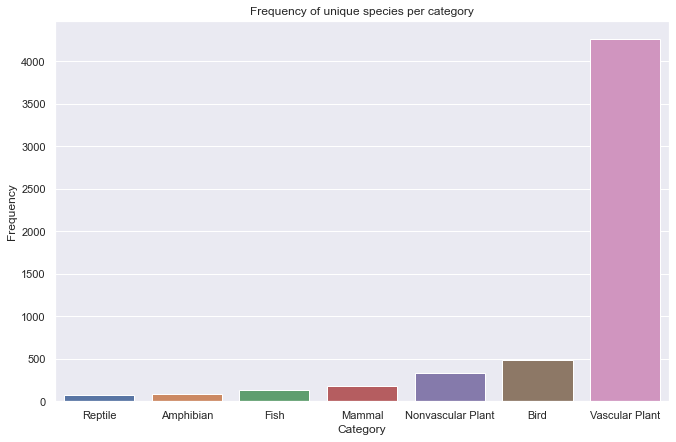

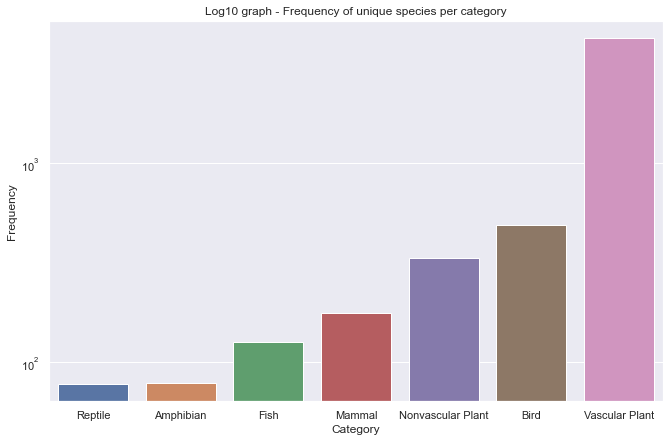

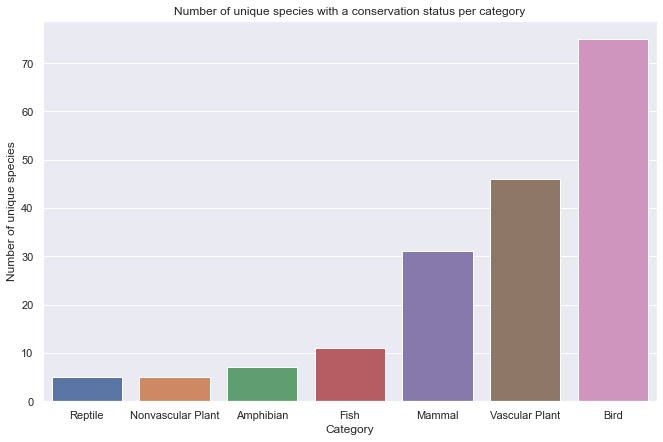

<Figure size 792x504 with 0 Axes>

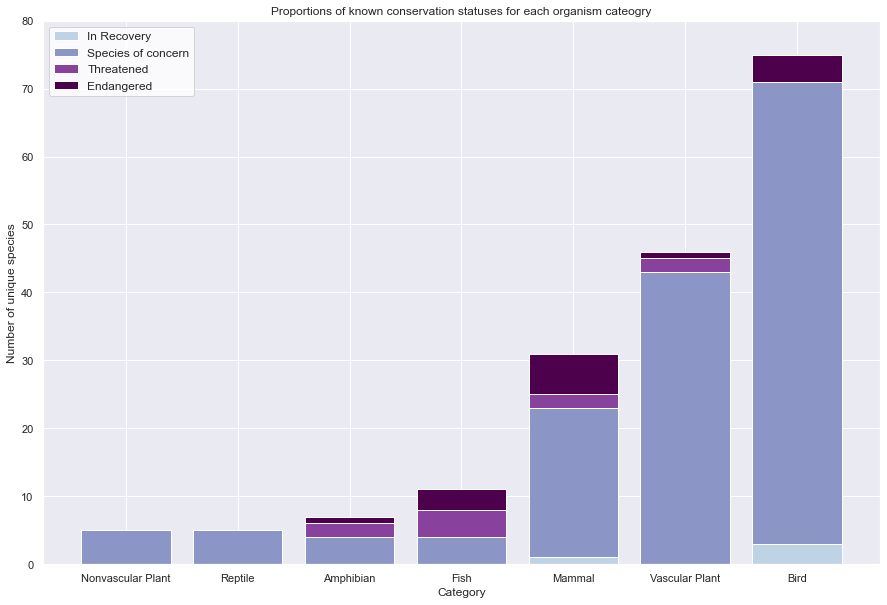

In [6]:
# Plot graphs to visual the data

# How many unique species are there per category?
sns.set_theme(rc={'figure.figsize' : (11, 7)})
sns.countplot(x='category', data=species_no_duplicates, order=species_no_duplicates['category'].value_counts(ascending = True).index)
plt.title('Frequency of unique species per category')
plt.ylabel('Frequency')
plt.xlabel('Category')

plt.show()
plt.clf()

# Log graph thrown in for fun.
sns.countplot(x='category', data=species_no_duplicates, order=species_no_duplicates['category'].value_counts(ascending = True).index)
plt.yscale('log')
plt.title('Log10 graph - Frequency of unique species per category')
plt.ylabel('Frequency')
plt.xlabel('Category')

plt.show()
plt.clf()

# How many species are there in each category with a value for conservation status?

sns.countplot(x='category', data=species_no_duplicates_dropna, order=species_no_duplicates_dropna['category'].value_counts(ascending = True).index)
plt.title('Number of unique species with a conservation status per category')
plt.ylabel('Number of unique species')
plt.xlabel('Category')

plt.show()
plt.clf()

# What proportion of species have a known conservation status?

bottom_2 = np.array([number if number > 0 else 0 
                         for number in groupby_species_2_pivoted_reordered['In Recovery']])
bottom_3 = np.array([number if number > 0 else 0 
                         for number in groupby_species_2_pivoted_reordered['Species of Concern']])
bottom_4 = np.array([number if number > 0 else 0 
                         for number in groupby_species_2_pivoted_reordered['Threatened']])

f, ax = plt.subplots(figsize = (15, 10))
plt.ylim(0, 80)

sns.set_style('whitegrid')
    
plt.bar(x = 'category', height = 'In Recovery', data = groupby_species_2_pivoted_reordered,
            color = '#bfd3e6')
plt.bar(x = 'category', height = 'Species of Concern', data = groupby_species_2_pivoted_reordered,
            bottom = bottom_2, color = '#8c96c6')
plt.bar(x = 'category', height = 'Threatened', data = groupby_species_2_pivoted_reordered,
            bottom = (bottom_2 + bottom_3), color = '#88419d')
plt.bar(x = 'category', height = 'Endangered', data = groupby_species_2_pivoted_reordered,
            bottom = (bottom_2 + bottom_3 + bottom_4), color = '#4d004b')

plt.title('Proportions of known conservation statuses for each organism cateogry')
plt.ylabel('Number of unique species')
plt.xlabel('Category')
plt.legend(['In Recovery', 'Species of concern', 'Threatened', 'Endangered'], loc = 2, fontsize = 12)

plt.show()



# Number of observations per park with known conservation status (boxplot)

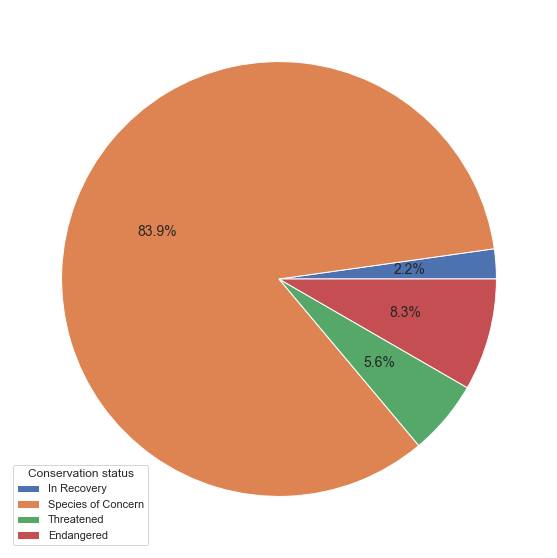

In [7]:
# Proportion of species in each national park

fig, ax = plt.subplots(figsize = (15, 10))

wedges, texts, autotexts = ax.pie(groupby_species_3_reordered['scientific_name'], autopct='%.1f%%', textprops={'fontsize': 14})

ax.legend(wedges, groupby_species_3_reordered['conservation_status'],
         title = 'Conservation status',
         loc = 3)

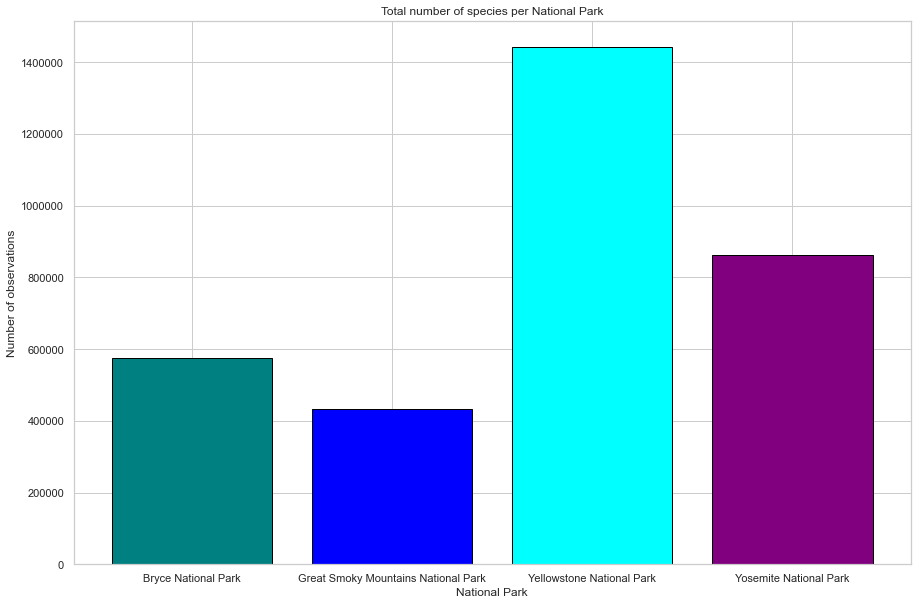

In [8]:
# Number of species per park

fig = plt.figure(figsize = (15, 10))
colours = ['teal', 'blue', 'cyan', 'purple']

plt.bar(groupby_observations_3['park_name'], groupby_observations_3['observations'], color=colours, edgecolor='black')
plt.yticks(np.arange(0, 1600000, 200000))
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Number of observations')
plt.xlabel('National Park')

plt.title('Total number of species per National Park')
plt.show()

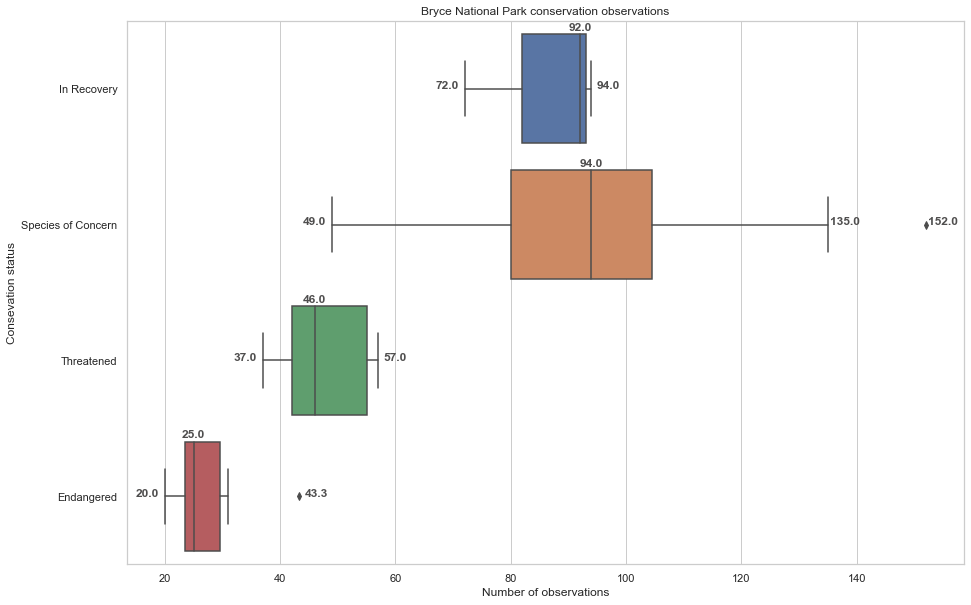

   category            scientific_name conservation_status       bryce  \
7    Mammal              Canis latrans  Species of Concern   85.000000   
8    Mammal                Canis lupus          Endangered   43.333333   
9    Mammal                Canis rufus          Endangered   30.000000   
29   Mammal           Eptesicus fuscus  Species of Concern   92.000000   
30   Mammal  Lasionycteris noctivagans  Species of Concern  114.000000   

    great_smoky_mountains  yellowstone    yosemite  
7               68.000000        206.0   99.000000  
8               19.666667        110.0   65.333333  
9               13.000000         60.0   34.000000  
29              73.000000        231.5  127.000000  
30              37.500000        225.0  133.000000  


<Figure size 792x504 with 0 Axes>

In [15]:
# Number of observations per park with known conservation status (boxplot)
labels = ['In Recovery', 'Species of Concern', 'Threatened', 'Endangered']

park_conservation_observations = merged_df[(merged_df.conservation_status == 'In Recovery')
                                          | (merged_df.conservation_status == 'Species of Concern')
                                          | (merged_df.conservation_status == 'Threatened')
                                          | (merged_df.conservation_status == 'Endangered')]

f, ax = plt.subplots(figsize = (15, 10))
plot = sns.boxplot(y = 'conservation_status', x = 'bryce', data = park_conservation_observations, orient = 'h', order = labels)
plt.xlabel('Number of observations')
plt.ylabel('Consevation status')

# how to do annotations

mins = []
for label in labels:
    min_val = park_conservation_observations[park_conservation_observations.conservation_status == label].bryce.min()
    mins.append(min_val)
for i in range(4):
    plt.text(x = mins[i] - 3, y = i, s = mins[i], horizontalalignment = 'center',
             size = 12, color = '#4f4e4e', weight = 'semibold')
    
maxs = []
for label in labels:
    max_val = round(park_conservation_observations[park_conservation_observations.conservation_status == label].bryce.max(), 1)
    maxs.append(max_val)
for i in range(4):
    plt.text(x = maxs[i] + 3, y = i, s = maxs[i], horizontalalignment = 'center',
            size = 12, color = '#4f4e4e', weight = 'semibold')
    
medians = []
for label in labels:
    med_val = park_conservation_observations[park_conservation_observations.conservation_status == label].bryce.median()
    medians.append(med_val)
for i in range(4):
    plt.text(x = medians[i], y = i - 0.43, s = medians[i], horizontalalignment = 'center',
            size = 12, color = '#4f4e4e', weight = 'semibold')

additional_points = []
new_max_concern = sorted(list(park_conservation_observations[park_conservation_observations.conservation_status == 'Species of Concern'].bryce))[-2]
new_max_endangered = sorted(list(park_conservation_observations[park_conservation_observations.conservation_status == 'Endangered'].bryce))[-2]
additional_points.append(new_max_concern)
additional_points.append(new_max_endangered)

plt.text(x = additional_points[0] + 3, y = 1, s = additional_points[0], horizontalalignment = 'center',
        size = 12, color = '#4f4e4e', weight = 'semibold')
plt.title('Bryce National Park conservation observations')
plt.show()
plt.clf()

print(park_conservation_observations.head())

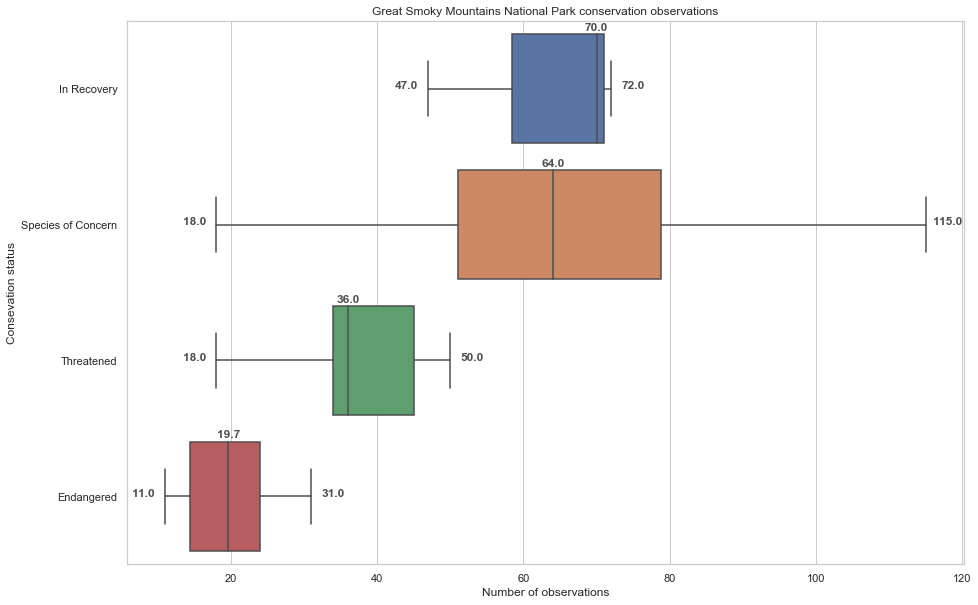

<Figure size 792x504 with 0 Axes>

In [18]:
f, ax = plt.subplots(figsize = (15, 10))
plot = sns.boxplot(y = 'conservation_status', x = 'great_smoky_mountains', data = park_conservation_observations, orient = 'h', order = labels)
plt.xlabel('Number of observations')
plt.ylabel('Consevation status')

mins = []
for label in labels:
    min_val = park_conservation_observations[park_conservation_observations.conservation_status == label].great_smoky_mountains.min()
    mins.append(min_val)
for i in range(4):
    plt.text(x = mins[i] - 3, y = i, s = mins[i], horizontalalignment = 'center',
             size = 12, color = '#4f4e4e', weight = 'semibold')
    
maxs = []
for label in labels:
    max_val = round(park_conservation_observations[park_conservation_observations.conservation_status == label].great_smoky_mountains.max(), 1)
    maxs.append(max_val)
for i in range(4):
    plt.text(x = maxs[i] + 3, y = i, s = maxs[i], horizontalalignment = 'center',
            size = 12, color = '#4f4e4e', weight = 'semibold')
    
medians = []
for label in labels:
    med_val = round(park_conservation_observations[park_conservation_observations.conservation_status == label].great_smoky_mountains.median(), 1)
    medians.append(med_val)
for i in range(4):
    plt.text(x = medians[i], y = i - 0.43, s = medians[i], horizontalalignment = 'center',
            size = 12, color = '#4f4e4e', weight = 'semibold')

plt.title('Great Smoky Mountains National Park conservation observations')
plt.show()
plt.clf()

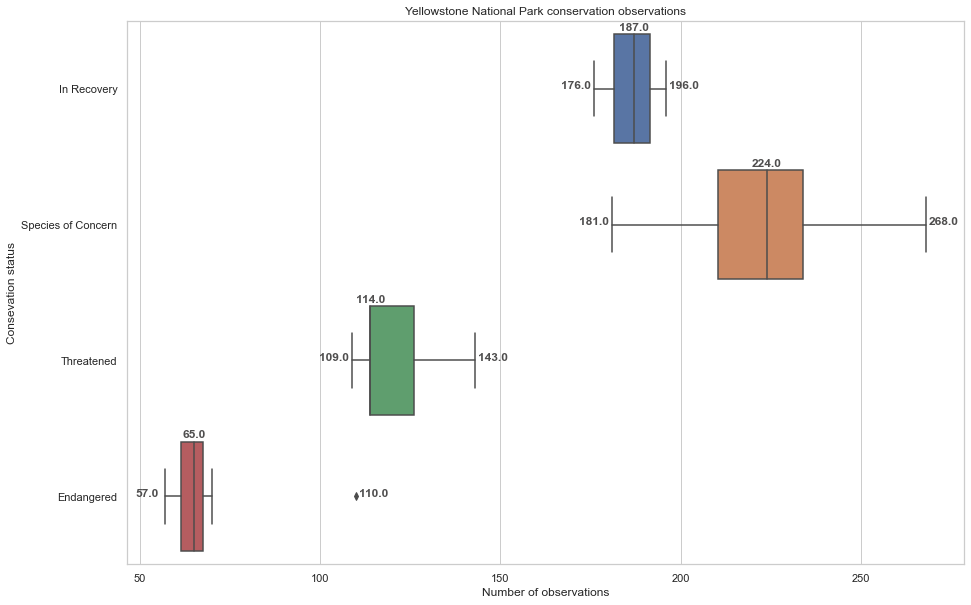

<Figure size 792x504 with 0 Axes>

In [22]:
f, ax = plt.subplots(figsize = (15, 10))
plot = sns.boxplot(y = 'conservation_status', x = 'yellowstone', data = park_conservation_observations, orient = 'h', order = labels)
plt.xlabel('Number of observations')
plt.ylabel('Consevation status')

mins = []
for label in labels:
    min_val = park_conservation_observations[park_conservation_observations.conservation_status == label].yellowstone.min()
    mins.append(min_val)
for i in range(4):
    plt.text(x = mins[i] - 5, y = i, s = mins[i], horizontalalignment = 'center',
             size = 12, color = '#4f4e4e', weight = 'semibold')
    
maxs = []
for label in labels:
    max_val = round(park_conservation_observations[park_conservation_observations.conservation_status == label].yellowstone.max(), 1)
    maxs.append(max_val)
for i in range(4):
    plt.text(x = maxs[i] + 5, y = i, s = maxs[i], horizontalalignment = 'center',
            size = 12, color = '#4f4e4e', weight = 'semibold')
    
medians = []
for label in labels:
    med_val = round(park_conservation_observations[park_conservation_observations.conservation_status == label].yellowstone.median(), 1)
    medians.append(med_val)
for i in range(4):
    plt.text(x = medians[i], y = i - 0.43, s = medians[i], horizontalalignment = 'center',
            size = 12, color = '#4f4e4e', weight = 'semibold')

plt.title('Yellowstone National Park conservation observations')
plt.show()
plt.clf()

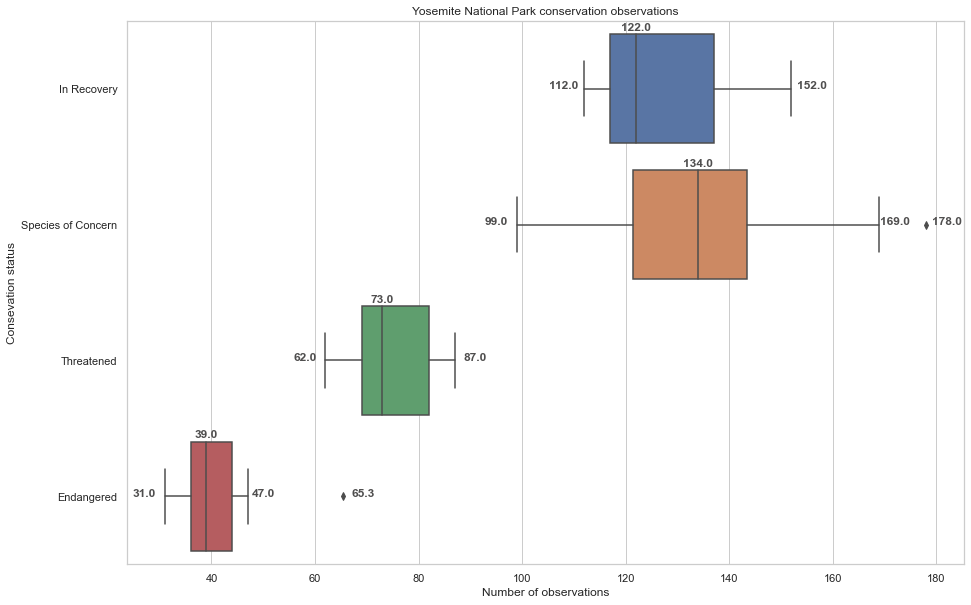

<Figure size 792x504 with 0 Axes>

In [32]:
f, ax = plt.subplots(figsize = (15, 10))
plot = sns.boxplot(y = 'conservation_status', x = 'yosemite', data = park_conservation_observations, orient = 'h', order = labels)
plt.xlabel('Number of observations')
plt.ylabel('Consevation status')

mins = []
for label in labels:
    min_val = park_conservation_observations[park_conservation_observations.conservation_status == label].yosemite.min()
    mins.append(min_val)
for i in range(4):
    plt.text(x = mins[i] - 4, y = i, s = mins[i], horizontalalignment = 'center',
             size = 12, color = '#4f4e4e', weight = 'semibold')
    
maxs = []
for label in labels:
    max_val = round(park_conservation_observations[park_conservation_observations.conservation_status == label].yosemite.max(), 1)
    maxs.append(max_val)
for i in range(4):
    plt.text(x = maxs[i] + 4, y = i, s = maxs[i], horizontalalignment = 'center',
            size = 12, color = '#4f4e4e', weight = 'semibold')
    
medians = []
for label in labels:
    med_val = round(park_conservation_observations[park_conservation_observations.conservation_status == label].yosemite.median(), 1)
    medians.append(med_val)
for i in range(4):
    plt.text(x = medians[i], y = i - 0.43, s = medians[i], horizontalalignment = 'center',
            size = 12, color = '#4f4e4e', weight = 'semibold')

additional_points = []
new_max_concern = sorted(list(park_conservation_observations[park_conservation_observations.conservation_status == 'Species of Concern'].yosemite))[-2]
new_max_endangered = sorted(list(park_conservation_observations[park_conservation_observations.conservation_status == 'Endangered'].yosemite))[-2]
additional_points.append(new_max_concern)
additional_points.append(new_max_endangered)

plt.text(x = additional_points[0] + 3, y = 1, s = additional_points[0], horizontalalignment = 'center',
        size = 12, color = '#4f4e4e', weight = 'semibold')
plt.text(x = additional_points[1] + 3, y = 3, s = additional_points[1], horizontalalignment = 'center',
        size = 12, color = '#4f4e4e', weight = 'semibold')

plt.title('Yosemite National Park conservation observations')
plt.show()
plt.clf()